# Unsupervised learning, PCA
2 types: **transformations**, **clustering**

### Transformations
Create new representation of data which might be easier for humans / other ML algorithms to understand (summarize the essential characteristics with  fewest features possible, find out the components that capture the essence of the dataset - e.g. in PCA)

#### Algorithms
- PCA
- t-SNE

### Clustering
Partition dataset into groups of similar items

Main challenge: we don't know what the true label is, we can't generally say whether the model 'did well'. As a consequence, unsup. algorithms are often used only in exploratory/preprocessing phases.

#### Algorithms
- k-means - specify number of clusters
- agglomerative clustering - specify number of clusters
- DBSCAN - defined proximity by eps parameter



In [104]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer_dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target)

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
print(f"[Original]\nmin:\n{X_train.min(axis=0)}\nmax:\n{X_train.max(axis=0)}\nmean:\n{X_train.mean(axis=0)}\nstd:\n{X_train.std(axis=0)}")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(f"\n[MinMax]\nmin:\n{X_train_scaled.min(axis=0)}\nmax:\n{X_train_scaled.max(axis=0)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(f"\n[StandardScaler]\nmean:\n{X_train_scaled.mean(axis=0)}\nstd:\n{X_train_scaled.std(axis=0)}")

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(f"\n[RobustScaler]\nmean:\n{X_train_scaled.mean(axis=0)}\nstd:\n{X_train_scaled.std(axis=0)}")

[Original]
min:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 2.344e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 3.012e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max:
[2.742e+01 3.381e+01 1.869e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 2.906e-01 9.744e-02 2.547e+00 4.885e+00 1.865e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.716e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
mean:
[1.41667535e+01 1.93799061e+01 9.22842019e+01 6.58746009e+02
 9.65265023e-02 1.06366432e-01 9.15140134e-02 4.96577300e-02
 1.80903991e-01 6.29576056e-02 4.13016432e-01 1.23420094e+00
 2.91660892e+00 4.12773075e+01 7.16864085e-03 2.65507606e-02
 3.32436070e-02 1.20601056e-02 2.09613357e-02 3.90861972e-03
 1.63591901e+01 2.57161033e+01 1.07924953e+02 8.92495540

In [105]:
# scaling test set together with training set:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# DON'T .fit(X_test)

### PCA
Fit PCA and visualize the 2 found principal components

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
x_pca = pca.transform(X_train_scaled)
print(X_train_scaled.shape)
print(x_pca.shape)

(426, 30)
(426, 2)


Text(0, 0.5, 'Second component')

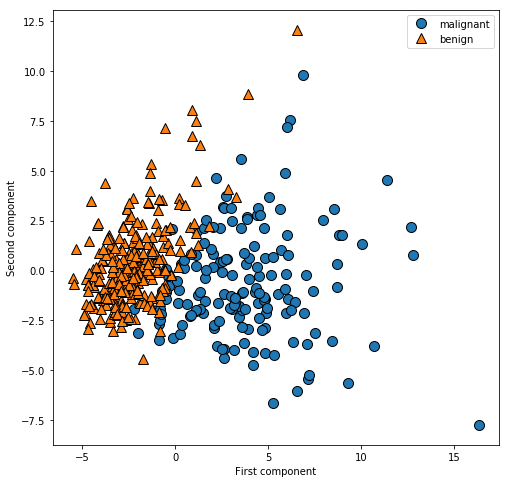

In [107]:
import matplotlib.pyplot as plt
import mglearn
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], y_train)
plt.legend(cancer_dataset.target_names)
plt.xlabel("First component")
plt.ylabel("Second component")

The separation boundary could be fitted quite well even with a simple classifier now. Let's explore the components.

(2, 30)
[[ 0.21709559  0.10087455  0.22572825  0.21960831  0.1450201   0.23609705
   0.25508863  0.25866134  0.1412563   0.06596578  0.21331055  0.02526602
   0.21816555  0.21023496  0.01614147  0.16752727  0.14721041  0.17928611
   0.04358296  0.09873618  0.22664495  0.10687725  0.23466499  0.22325459
   0.13438939  0.2086587   0.22660517  0.25109007  0.13045145  0.13424761]
 [-0.23099291 -0.069174   -0.21220158 -0.22812052  0.18913829  0.15366327
   0.06223427 -0.03306175  0.18959324  0.36683368 -0.09230019  0.08814806
  -0.07951745 -0.1468511   0.21413821  0.23782782  0.20168205  0.13737013
   0.20598656  0.2790195  -0.22162515 -0.06336309 -0.20303978 -0.22151373
   0.1666625   0.13359368  0.08934768 -0.01686114  0.13269866  0.26186807]]


Text(0, 0.5, 'Principal components')

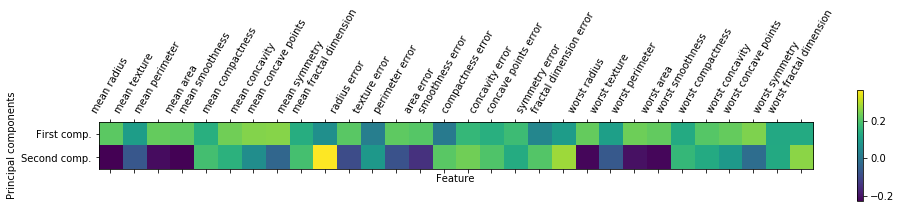

In [108]:
print(pca.components_.shape)
print(pca.components_)

plt.matshow(pca.components_)
plt.yticks([0,1], ["First comp.", "Second comp."])
plt.colorbar()
plt.xticks(range(len(cancer_dataset.feature_names)), cancer_dataset.feature_names, rotation=60)
plt.xlabel("Feature")
plt.ylabel("Principal components")

Feature extraction with images

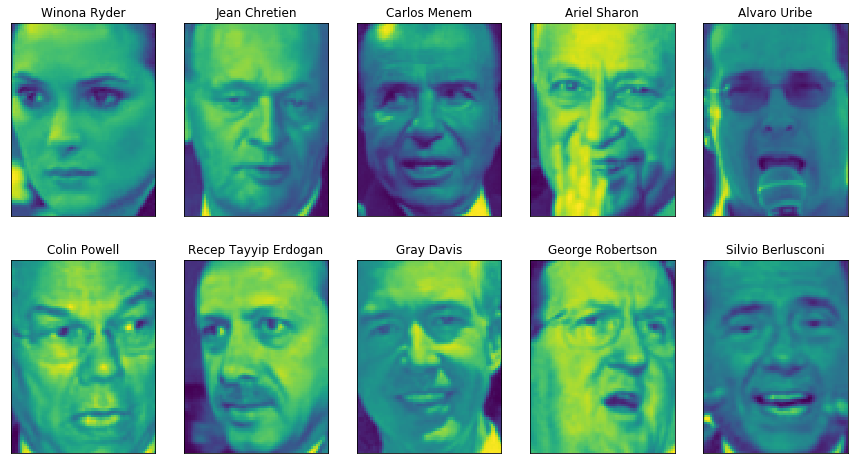

In [109]:
from sklearn.datasets import fetch_lfw_people
people_dataset = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
fix, axes = plt.subplots(2,5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks':()})
for target, image, ax in zip(people_dataset.target, people_dataset.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people_dataset.target_names[target])

In [110]:
people_dataset.images.shape

(3023, 87, 65)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(people_dataset.data, people_dataset.target, stratify=people_dataset.target)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.2976190476190476


Not bad for 61 classes, but not ideal, let's try PCA

In [112]:
# whitening rescales the principal components to have the same scale.
pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape)
print(X_train_pca.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(knn.score(X_test_pca, y_test))

(2267, 5655)
(2267, 100)
0.4523809523809524


### NMF - Non-negative matrix factorization
- looks for non-negative components
- particularly helpful if the data is made up from addition of multiple sources (e.g. sound)

Similarly to PCA tries to explain the data through a sum of components

Text(0, 0.5, 'Signal')

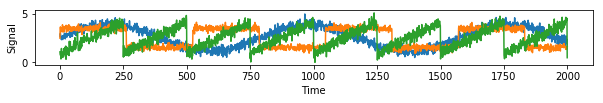

In [113]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Let's say i can observe the singal only comping from 3 sources (3 different measurements)

In [114]:
from sklearn.decomposition import NMF
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
nmf = NMF(n_components=3)
S_ = nmf.fit_transform(X)
pca = PCA(n_components=3)
H = pca.fit_transform(X)

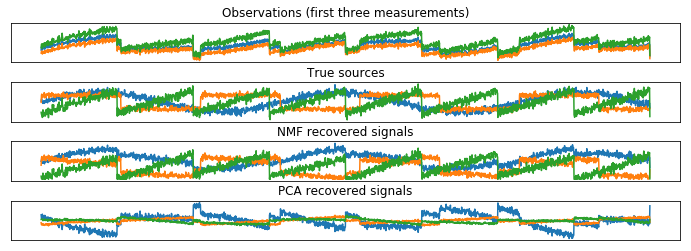

In [115]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
'True sources',
'NMF recovered signals',
'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(12, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

NMF did a reasonable job of discovering the true sources, while PCA failed to do so.

### t-SNE (Manifold learning)
- used for visualization, don't generate new features
- idea: find 2d representation of the data that preserve the distances betw. points (preserved information indicating whihc points are neighbours to each other)

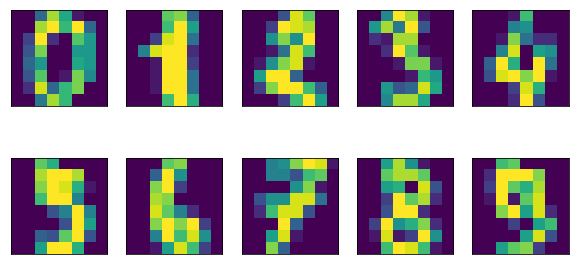

In [116]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits_dataset.images):
    ax.imshow(img)

Text(0.5, 0, 't-SNE feature 1')

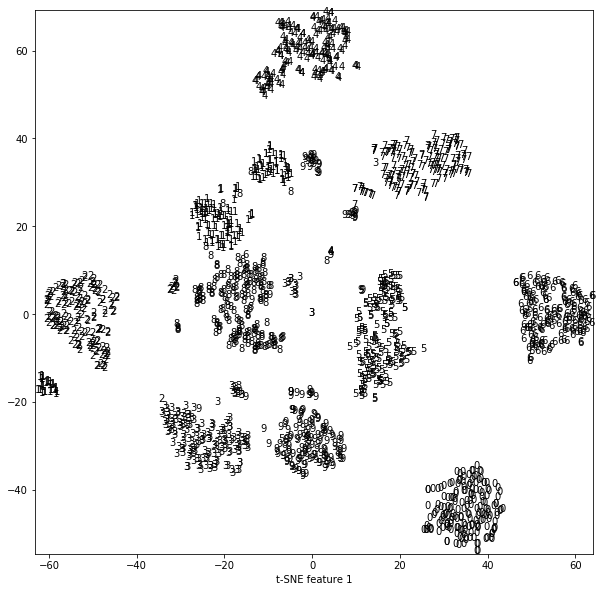

In [117]:
from sklearn.manifold import TSNE
tsne = TSNE()
digits_tsne = tsne.fit_transform(digits_dataset.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits_dataset.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits_dataset.target[i]))
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

## Clustering
### k-means

#### Advantages
- easy to interpret
- fast, scales easily

#### Disadvantages
- relies on random initialization
- restrictive assumtions on the shape of the clusters

- assign each data point to the closest center
- set each cluster center as meand of the datapoints assigned to it

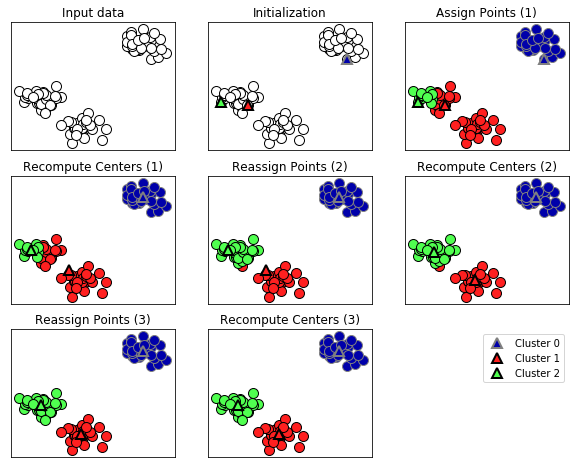

In [118]:
mglearn.plots.plot_kmeans_algorithm()

In [119]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

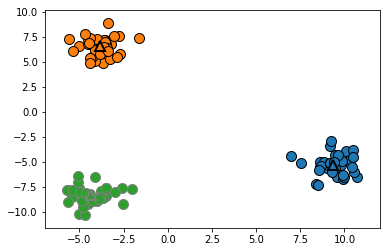

In [120]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

K-,eans assumes all directions are equally important for each cluster - if the groups are e.g. stretched toward the diagonal, k-means won't perform well

Text(0, 0.5, 'Feature 1')

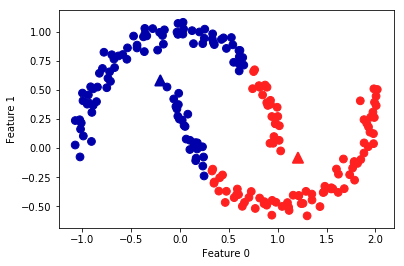

In [121]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means can be also viewed (in scope of dim. reduction methods mentioned earlierr) as a decomposition method where each group of points is represented using a single component = **vector quantization**.

### Agglomerative clustering
- each point is its own cluster, continue merging similar (acc. to linkage criteria) clusters until the specified number of clusters is created

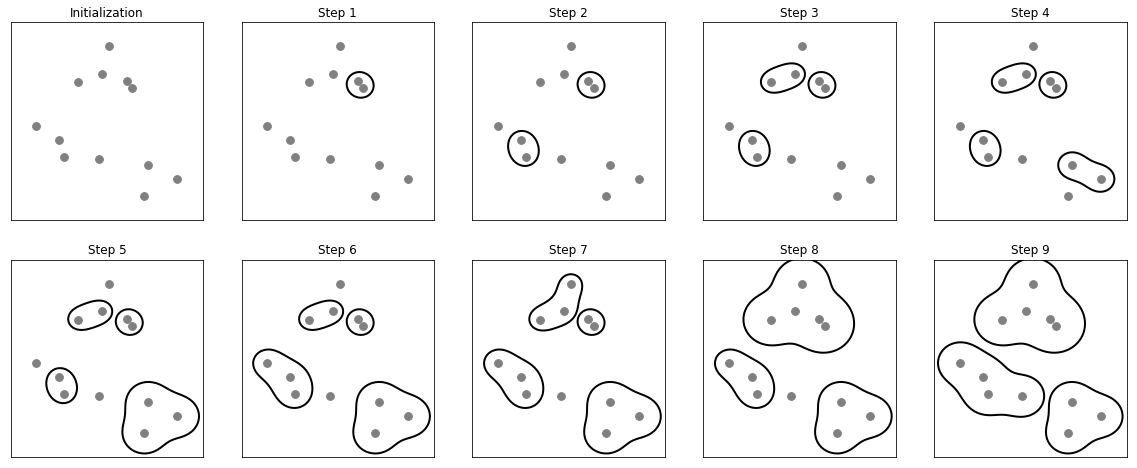

In [122]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

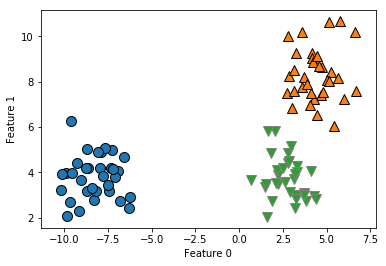

In [123]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs()
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

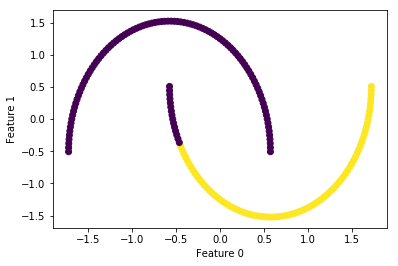

In [147]:
X, y = make_moons(n_samples=200)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
clusters = agg.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

To examine the process of joining the clusters, let's plot scipy's dendogram

Text(0, 0.5, 'Cluster distance')

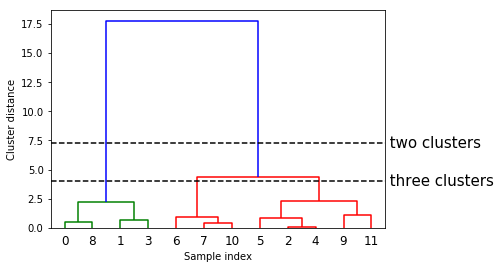

In [124]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(n_samples=12)
# aray of hierarchichal cluster similarities
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### DBSCAN

#### Advantages
- doesn't require set n. of clusters a-priori
- can capture complex cluster
- can identify outliers

#### Disadvantages
- somewhat slower

#### Parameters
- `eps` - what is means for points to be close. very small = no points are 'core', very large = all points forming a single cluster

Identifies dense regions in feature space, points within dese regions are called `core` samples. 
1. pick arbitrary datapoint
2. find all points within distance `eps`
    - if there are less than `min_samples` points within distance `eps` of the starting point, the point is labeled as noise
    - else labeled as `core` and assigned to a new cluster label
3. Repeat until there are no more core samples

In [125]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters
# Everything predicted as -1 = noise, because the default parameters are not 
# suitable for a toy dataset

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Let's try it on a `moons` dataset that has proven to be problematic before

Text(0, 0.5, 'Feature 1')

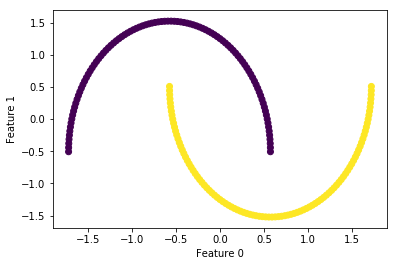

In [126]:
X, y = make_moons(n_samples=200)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Metrics
- ARI (adjusted rand index)
- NMI (normalized mutual information)

In [127]:
from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters = 2)
agglo = AgglomerativeClustering(n_clusters=2)
dbscan = DBSCAN()


print("ARI [kmeans]: {:.2f}".format(adjusted_rand_score(y, kmeans.fit_predict(X_scaled))))
print("ARI [agglo]: {:.2f}".format(adjusted_rand_score(y, agglo.fit_predict(X_scaled))))
print("ARI [dbscan]: {:.2f}".format(adjusted_rand_score(y, dbscan.fit_predict(X_scaled))))

ARI [kmeans]: 0.47
ARI [agglo]: 0.72
ARI [dbscan]: 1.00


## lfw dataset with clustering algorithms

In [139]:
X_people = people_dataset.data
y_people = people_dataset.target
pca = PCA(n_components=100, whiten=True)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

dbscan = DBSCAN(min_samples=3, eps=7)
labels_dbscan = dbscan.fit_predict(X_pca)
print(labels_dbscan.shape)

(3023,)


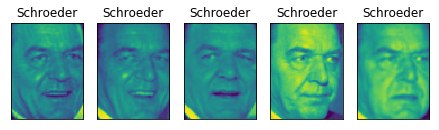

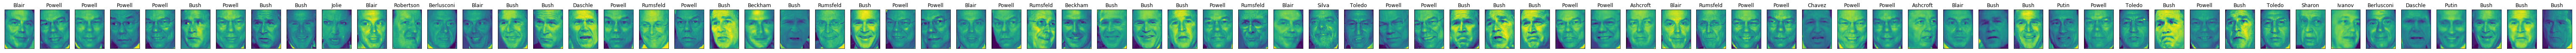

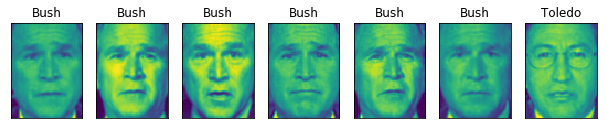

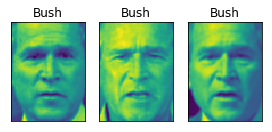

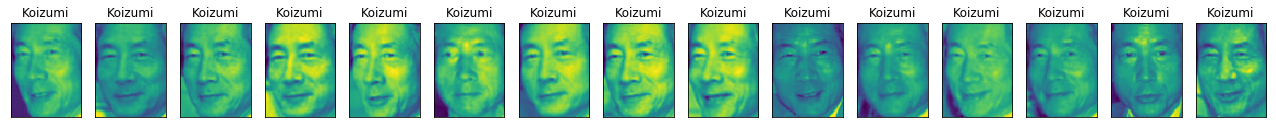

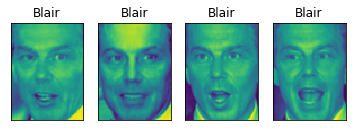

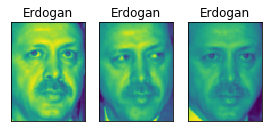

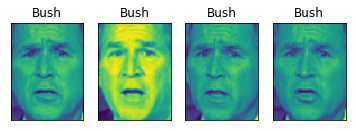

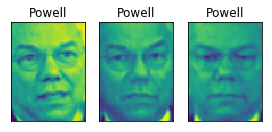

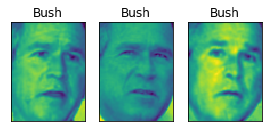

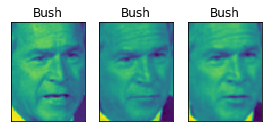

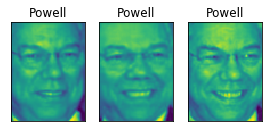

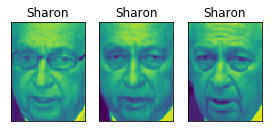

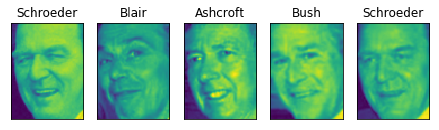

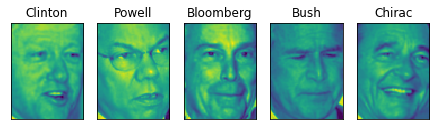

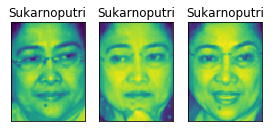

In [134]:
for cluster in range(max(labels) + 1):
    mask = labels_dbscan == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(people_dataset.images[0].shape))
        ax.set_title(people_dataset.target_names[label].split()[-1])

[153 366 310 421 199 345 303 217 416 293]
(3023,)


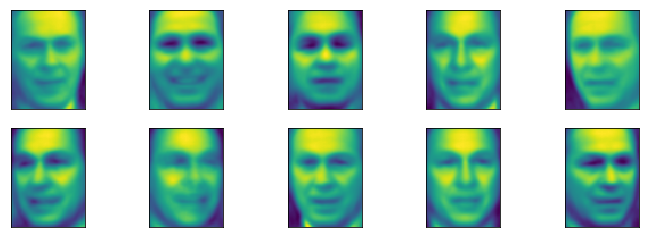

In [140]:
kmeans = KMeans(n_clusters=10)
labels_km = kmeans.fit_predict(X_pca)
print(np.bincount(labels_km))
print(labels_km.shape)

fig, axes = plt.subplots(2,5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(12, 4))
for center, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(people_dataset.images[0].shape))

cluster sizes agglomerative clustering: [109  85 300 186 345 169  24  62 117  49  16  37 117  34  40  65 118  70
  62 105  40  89  36  23  11  77  21 163  38  48  28  69  44  31  44  20
  26  56   2  47]


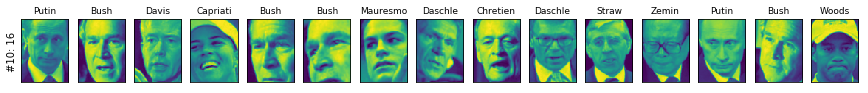

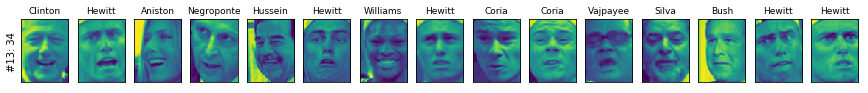

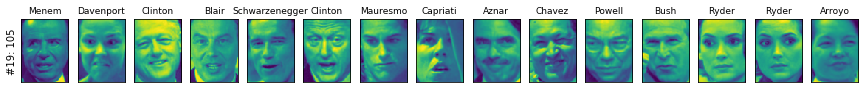

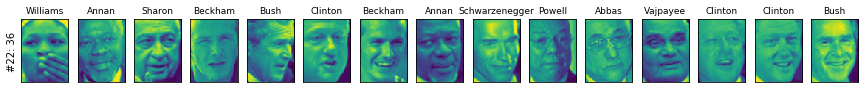

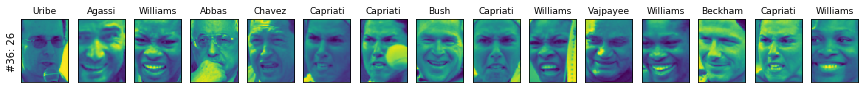

In [146]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
        labels_agg[mask], axes):
        ax.imshow(image.reshape(people_dataset.images[0].shape))
        ax.set_title(people_dataset.target_names[label].split()[-1],
        fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)